### Introduction
RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early hours of 15 April 1912, after colliding with an iceberg during her maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. RMS Titanic was the largest ship afloat at the time she entered service and was the second of three Olympic-class ocean liners operated by the White Star Line.
While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
we have to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).
    


### A Data Science Framework

Define the Problem:
    
Gather the Data:
    
Prepare Data for Consumption:
    
Perform Exploratory Analysis: 
    
Model Data:
    
Validate and Implement Data Model:
    
Optimize and Strategize:

### Understanding
It's the classical problem, predict the outcome of a binary event. In laymen terms this means, it either occurred or did not occur. For example, you won or did not win, you passed the test or did not pass the test, you were accepted or not accepted, and you get the point. 
A common business application is churn or customer retention. Another popular use case is, healthcare's mortality rate or survival analysis. Binary events create an interesting dynamic, because we know statistically, a random guess should achieve a 50% accuracy rate, without creating one single algorithm or writing one single line of code. 

### Step 1: Define the Problem
For this project, the problem statement is given to us on a golden plater, develop an algorithm to predict the survival outcome of passengers on the Titanic.

### Step 2 : Gather the Data
Data is downloaded from Kaggle. It consists of train, test and submission datasets in csv formats

### Step 3: Prepare Data for Consumption
Since step 2 was provided to us , Therefore, normal processes in data wrangling, such as data architecture, governance, and extraction are out of scope. Thus, only data cleaning is in scope.

### 3.1 Import Libraries


### 3.11 Load Data Modelling Libraries
We will use the popular scikit-learn library to develop our machine learning algorithms. In sklearn, algorithms are called Estimators and implemented in their own classes. For data visualization, we will use the matplotlib and seaborn library. Below are common classes to load.

In [1]:
# NumPy
import numpy as np

# Dataframe operations
import pandas as pd
pd.set_option('display.max_columns', None)

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Feature Scaling
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

# Scalers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

# Models
import sklearn
from sklearn.feature_selection import SelectFromModel
from sklearn import linear_model
from sklearn import tree
from sklearn import neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.linear_model import Perceptron
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

# Cross-validation
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.model_selection import cross_validate

# Checking Accuracy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, r2_score, mean_squared_error

# GridSearchCV
from sklearn.model_selection import GridSearchCV

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

import random
import time

/Applications/Utilities/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 3.2 Meet and Greet Data

In [2]:
# data available on Kaggle (https://www.kaggle.com/c/titanic/data)

train = pd.read_csv(r"/Users/user/Downloads/titanic/train.csv") 
test = pd.read_csv(r"/Users/user/Downloads/titanic/test.csv") 

In [3]:
data = [train, test] # for operations on both datsets

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
322,1214,2,"Nesson, Mr. Israel",male,26.0,0,0,244368,13.0000,F2,S
129,1021,3,"Petersen, Mr. Marius",male,24.0,0,0,342441,8.0500,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
209,1101,3,"Delalic, Mr. Redjo",male,25.0,0,0,349250,7.8958,NaN,S
97,989,3,"Makinen, Mr. Kalle Edvard",male,29.0,0,0,STON/O 2. 3101268,7.9250,NaN,S


### Data info
The Survived variable is our outcome or dependent variable. It is a binary nominal datatype of 1 for survived and 0 for did not survive. All other variables are potential predictor or independent variables. It's important to note, more predictor variables do not make a better model, but the right variables.

The PassengerID and Ticket variables are assumed to be random unique identifiers, that have no impact on the outcome variable. Thus, they will be excluded from analysis.

The Pclass variable is an ordinal datatype for the ticket class, a proxy for socio-economic status (SES), representing 1 = upper class, 2 = middle class, and 3 = lower class.

The Name variable is a nominal datatype. It could be used in feature engineering to derive the gender from title, family size from surname, and SES from titles like doctor or master. Since these variables already exist, we'll make use of it to see if title, like master, makes a difference.

The Sex and Embarked variables are a nominal datatype. They will be converted to dummy variables for mathematical calculations.

The Age and Fare variable are continuous quantitative datatypes. Age is fractional if less than If the age is estimated, is it in the form of xx.5

The SibSp represents number of related siblings/spouse aboard and Parch represents number of related parents/children aboard. Both are discrete quantitative datatypes. This can be used for feature engineering to create a family size and is alone variable.

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)


Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

The Cabin variable is a nominal datatype that can be used in feature engineering for approximate position on ship when the incident occurred and SES from deck levels.

The Embarked variable represents the emabarking place. S- Southampton, C-Cherbourg in France, Q-Queenstown (now Cobh) in Ireland. 

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.describe(include = 'O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Davis, Miss. Mary",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [9]:
# unique values or range for feature set

print('Genders:', train['Sex'].unique())
print('Embarked:', train['Embarked'].unique())
print('Pclass:', train['Pclass'].unique())
print('Survived:', train['Survived'].unique())
print('SibSp Range:', train['SibSp'].min(),'-',train['SibSp'].max())
print('Parch Range:', train['Parch'].min(),'-',train['Parch'].max())
print('Fare Range:', train['Fare'].min(),'-',train['Fare'].max())
print('Age:', train['Age'].min(),'-',train['Age'].max())

Genders: ['male' 'female']
Embarked: ['S' 'C' 'Q' nan]
Pclass: [3 1 2]
Survived: [0 1]
SibSp Range: 0 - 8
Parch Range: 0 - 6
Fare Range: 0.0 - 512.3292
Age: 0.42 - 80.0


#### Numerical and Categorical Features

In [10]:
# list of numerical variables

num_vars = [var for var in train.columns if train[var].dtypes != 'O']
print('Number of numerical variables: ', num_vars, len(num_vars))

Number of numerical variables:  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'] 7


In [11]:
#list of discrete variables

discrete_vars = [var for var in num_vars if len(train[var].unique())<20 and var not in ['PassengerId']]
print('Number of discrete variables: ', discrete_vars, len(discrete_vars))

Number of discrete variables:  ['Survived', 'Pclass', 'SibSp', 'Parch'] 4


In [12]:
# list of continuous variables

cont_vars = [var for var in num_vars if var not in discrete_vars+['PassengerId']]
print('Number of continuous variables: ', cont_vars, len(cont_vars))

Number of continuous variables:  ['Age', 'Fare'] 2


In [13]:
### Categorical variables

cat_vars = [var for var in train.columns if train[var].dtypes=='O']
print('Number of categorical variables: ', cat_vars, len(cat_vars))

Number of categorical variables:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'] 5


In [14]:
# Checking cardianility
for var in cat_vars:
    print(var, len(train[var].unique()), ' categories')

Name 891  categories
Sex 2  categories
Ticket 681  categories
Cabin 148  categories
Embarked 4  categories


### 3.21 The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting

Text(0, 0.5, 'Fare($)')

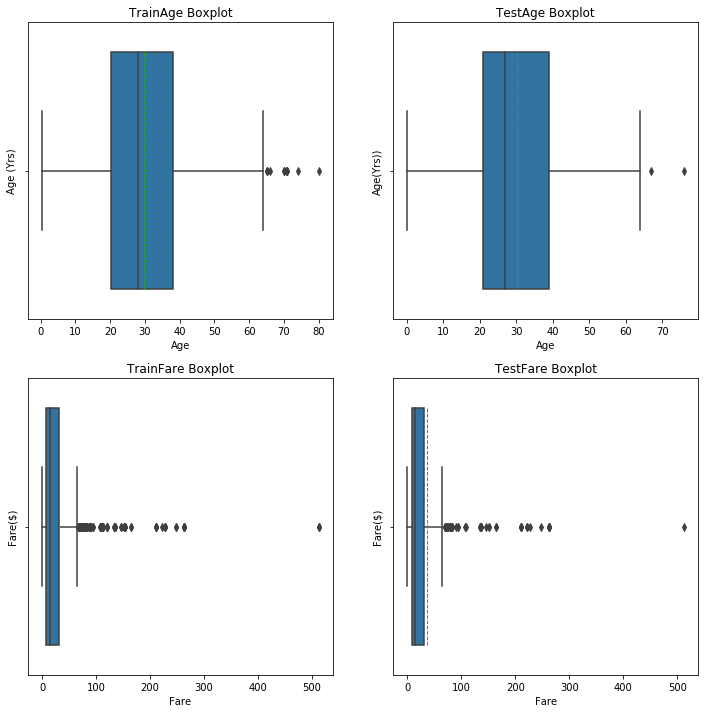

In [15]:
# Correcting
# Lets see 'Age' and 'Fare' distribution to check outliers
plt.figure(figsize=[12,12])

plt.subplot(221)
sns.boxplot(train['Age'],showmeans = True, meanline = True);
plt.title('TrainAge Boxplot')
plt.ylabel('Age (Yrs)')

plt.subplot(222)
sns.boxplot(test['Age'], showmeans = True, meanline = True);
plt.title('TestAge Boxplot')
plt.ylabel('Age(Yrs))')


plt.subplot(223)
sns.boxplot(train['Fare'],showmeans = True, meanline = True);
plt.title('TrainFare Boxplot')
plt.ylabel('Fare($)')

plt.subplot(224)
sns.boxplot(test['Fare'], showmeans = True, meanline = True);
plt.title('TestFare Boxplot')
plt.ylabel('Fare($)')

In [16]:
# 'Age'and 'Fare' have outliers , both in train and test data, and I have decided to keep the outliers

#### 3.22.1 Correcting - Reviewing the data, there does not appear to be any aberrant or non-acceptable data inputs.

In [17]:
# Before going to 'Complete' (Imputation), lets see brief insight in to relation between various features and 
# dependent variable ("Survived")

### Data Visualisation to get some insights

0    549
1    342
Name: Survived, dtype: int64 ********************
0    0.616162
1    0.383838
Name: Survived, dtype: float64


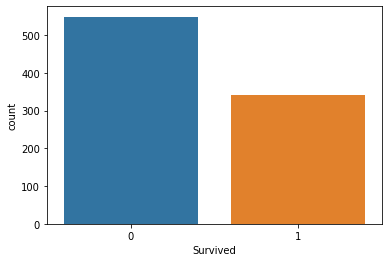

In [18]:
# 'Survived'

print(train['Survived'].value_counts(), '*'*20)
print(train['Survived'].value_counts()/len(train))
sns.countplot(x= 'Survived', data= train)

#### Visualising Target lable 'Survived' vis a vis continuous numerical features , 'Age' and 'Fare'

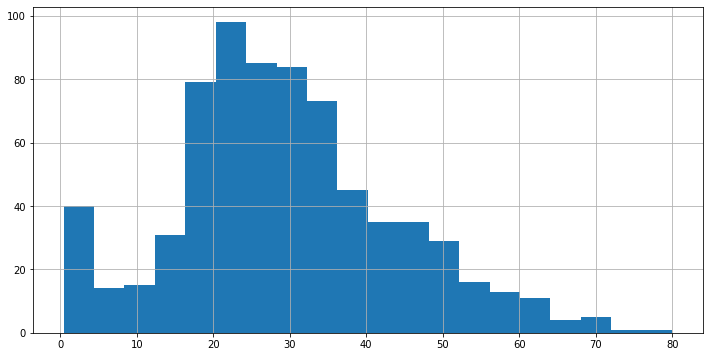

In [19]:
# Lets analyse Age distribution
plt.figure(figsize=(12,6))
train['Age'].hist(bins= 20)
plt.show()

In [20]:
# Its right skewed, therefore its better to fill it with the median value, 
# however there are two distinct areas, one from Age 0 to 16, and then 16 to 80

Density Plot of Age for Surviving Population and Deceased Population


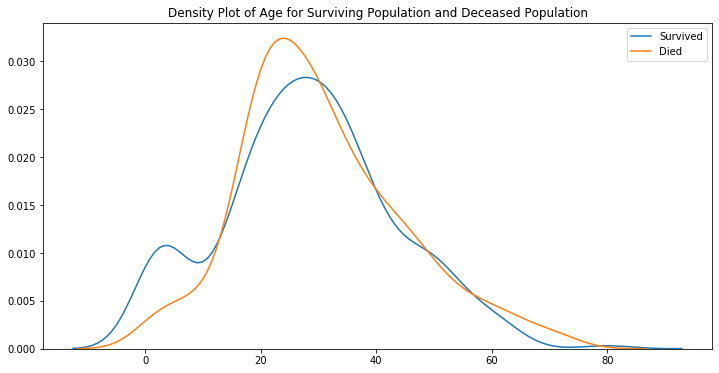

In [21]:
# Lets analyse survivability vis a vis Age

print("Density Plot of Age for Surviving Population and Deceased Population")
plt.figure(figsize=(12,6))
sns.kdeplot(train["Age"][train.Survived == 1])
sns.kdeplot(train["Age"][train.Survived == 0])
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
plt.show();

In [22]:
# It shows that various age groups had different survivability. Its better to make different Age groups 

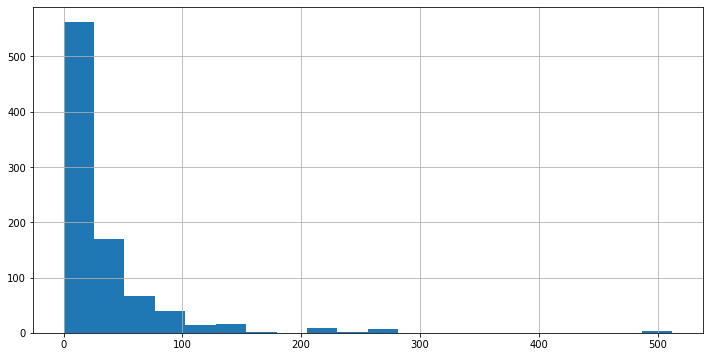

In [23]:
# Lets analyse 'Fare' distribution
plt.figure(figsize = (12,6))
train['Fare'].hist(bins= 20)
plt.show()

Density Plot of Fare for Surviving Population and Deceased Population


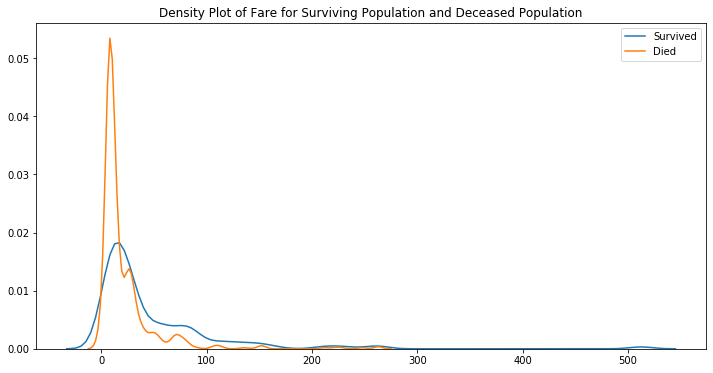

In [24]:
# As Fare is a continuous feature, lets draw density plot for Survived

print("Density Plot of Fare for Surviving Population and Deceased Population")
plt.figure(figsize=(12,6))
sns.kdeplot(train["Fare"][train.Survived == 1])
sns.kdeplot(train["Fare"][train.Survived == 0])
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
plt.show();

In [25]:
# Can be seen that people with low fares had poor survivability

### Visualising Target lable 'Survived' vis a vis discrete numerical features - 'Pclass', 'SibSp', 'Parch'

3    491
1    216
2    184
Name: Pclass, dtype: int64
3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64


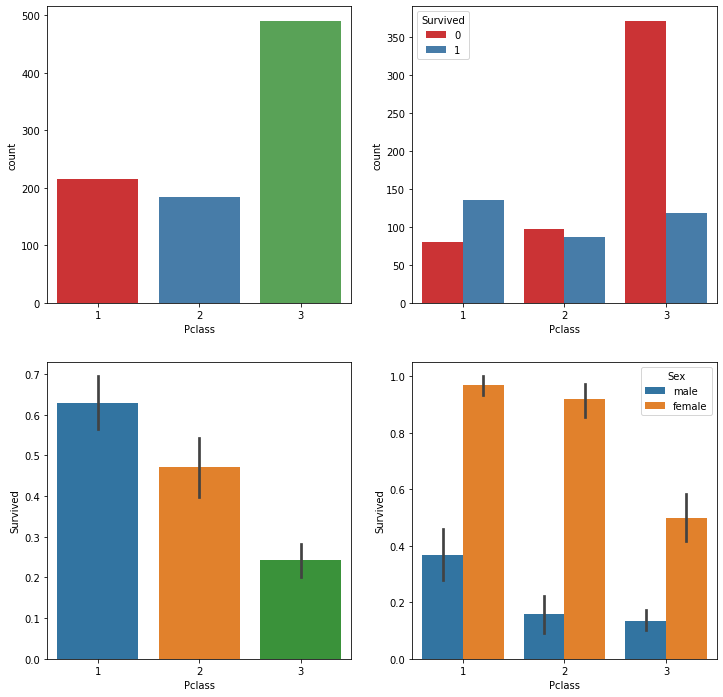

In [26]:
print(train['Pclass'].value_counts())
print(train['Pclass'].value_counts()/len(train))
plt.figure(figsize = (12,12))
plt.subplot(221)
sns.countplot(x='Pclass',data=train,palette='Set1')
plt.subplot(222)
sns.countplot(x='Pclass', hue = 'Survived', data=train, palette='Set1')
plt.subplot(223)
sns.barplot(x = 'Pclass', y= 'Survived',data=train)
plt.subplot(224)
sns.barplot(x = 'Pclass', y= 'Survived',hue = 'Sex', data=train)
plt.show()

In [27]:
# It can be seen that class3 had maximum passengers, but class1 passengers had best survivability

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64


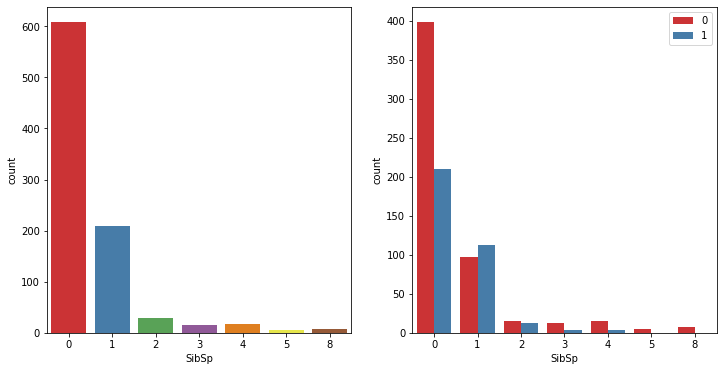

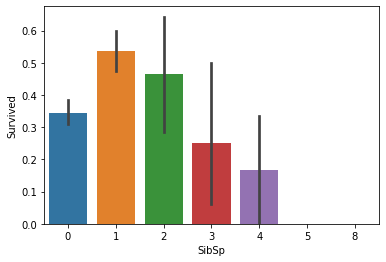

In [28]:
# Lets analyse survivability vis a vis Sibsp
print(train['SibSp'].value_counts())
print(train['SibSp'].value_counts()/len(train))

plt.figure(figsize = (12,6))
plt.subplot(121)
sns.countplot(x='SibSp',data=train,palette='Set1')

plt.subplot(122)
sns.countplot(x='SibSp', hue = 'Survived', data=train, palette='Set1')
plt.legend(loc='upper right')
plt.show()

sns.barplot(x = 'SibSp', y= 'Survived', data=train)
plt.show()

In [29]:
# People with sibling support of 1 and 2 had better 'Survived' chance

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: Parch, dtype: float64


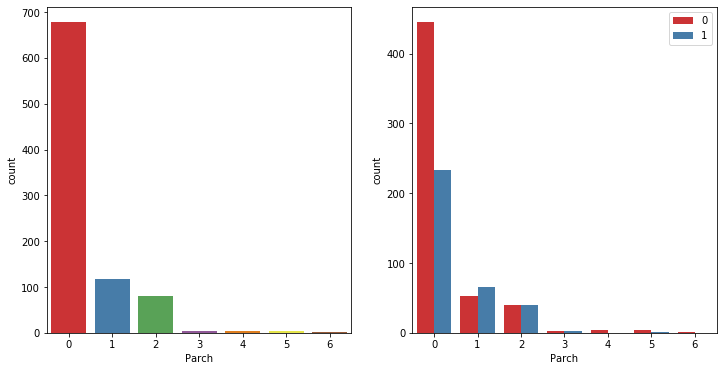

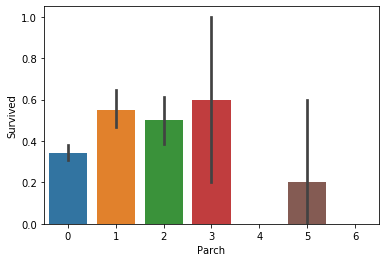

In [30]:
# Lets analyse survivability vis a vis Parch (Parent and children)
print(train['Parch'].value_counts())
print(train['Parch'].value_counts()/len(train))
plt.figure(figsize = (12,6))
plt.subplot(121)
sns.countplot(x='Parch',data=train,palette='Set1')
plt.subplot(122)
sns.countplot(x='Parch', hue = 'Survived', data=train, palette='Set1')
plt.legend(loc='upper right')
plt.show()

sns.barplot(x = 'Parch', y= 'Survived', data=train)
plt.show()

In [31]:
# It can be seen that most people were alone, however alone people had less surivability 
# in comparison to people tarvelling with 1-3 sibling/parent/children
# We can combine these features in one column 'Family'
# As most of the people were alone, and it was a major factor deciding 'Survived', we can make a new column'IsAlone'

#### Visualising Target lable 'Survived' vis a vis categorical features - 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'

In [32]:
train['Name'].nunique()

891

In [33]:
#There are 891 names. Though it looks like that Names do not ave any realtion with 'Survived' 
# however we can extract titles and make some insights. We will do that in feature engineering 

male      577
female    314
Name: Sex, dtype: int64
male      0.647587
female    0.352413
Name: Sex, dtype: float64


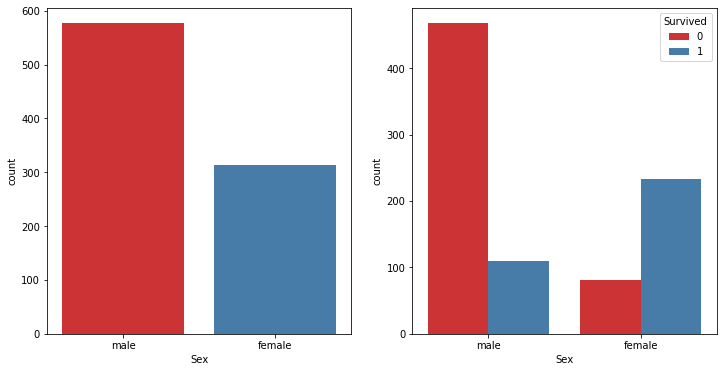

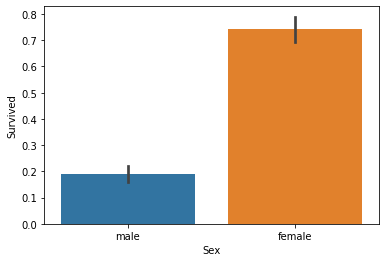

In [34]:
# Lets visualise 'Sex' and make some insights

print(train['Sex'].value_counts())
print(train['Sex'].value_counts()/len(train))

plt.figure(figsize = (12,6))
plt.subplot(121)
sns.countplot(x='Sex',data=train,palette='Set1')

plt.subplot(122)
sns.countplot(x='Sex', hue = 'Survived', data=train, palette='Set1')
plt.show()

sns.barplot(x = 'Sex', y= 'Survived',data=train)
plt.show()

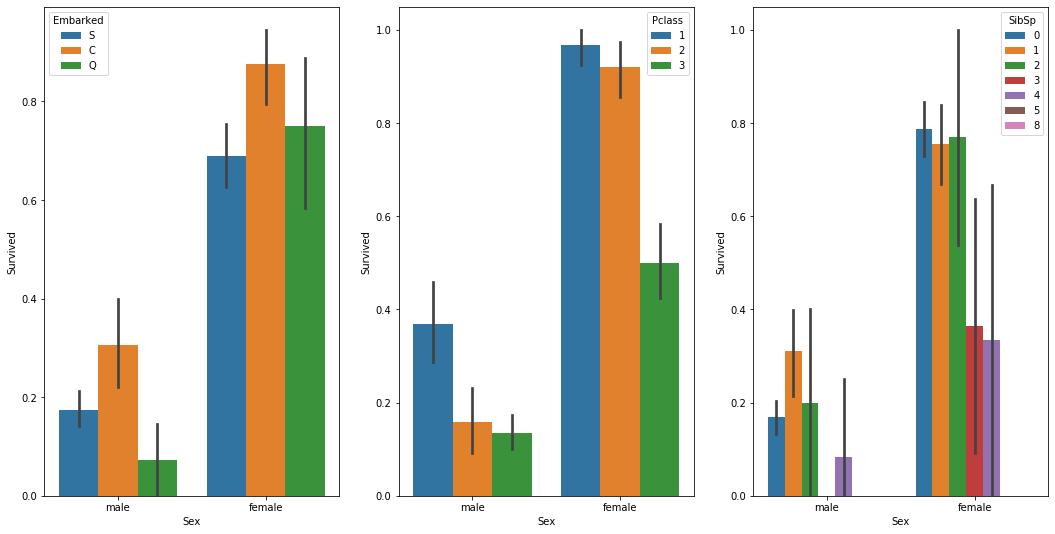

In [35]:
#graph distribution of qualitative data: Sex
#we know sex mattered in survival, now let's compare sex and a 2nd feature
fig, qaxis = plt.subplots(1,3,figsize=(18,9))

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=train, ax = qaxis[0])

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=train, ax  = qaxis[1])

sns.barplot(x = 'Sex', y = 'Survived', hue = 'SibSp', data=train, ax  = qaxis[2])

In [36]:
# It can be seen that females had better survivability than males

In [37]:
# Ticket
train['Ticket'].nunique()

681

In [38]:
# there were 681 tickets for 891 passengers. 
#It shows that some people in group travelled on same ticket
# we can find people traveling in a group with this

In [39]:
# Cabin
print(train['Cabin'].nunique(), train['Cabin'].isnull().sum())

147 687


S    644
C    168
Q     77
Name: Embarked, dtype: int64
S    0.722783
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64


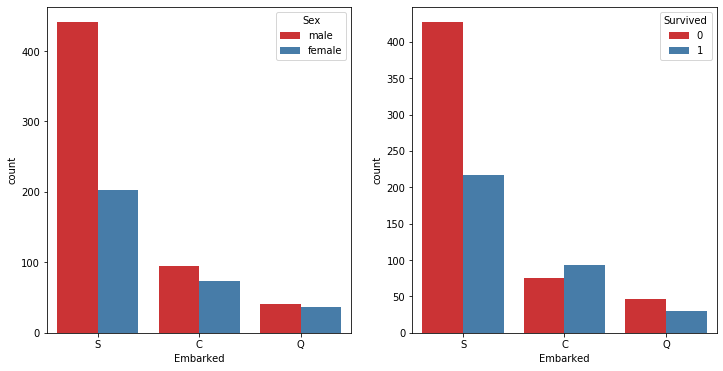

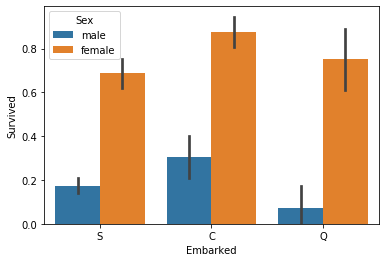

In [40]:
# Embarked
print(train['Embarked'].value_counts())
print(train['Embarked'].value_counts()/len(train))

plt.figure(figsize = (12,6))
plt.subplot(121)
sns.countplot(x='Embarked',hue = 'Sex', data=train,palette='Set1')

plt.subplot(122)
sns.countplot(x='Embarked', hue = 'Survived', data=train, palette='Set1')
plt.show()

sns.barplot(x = 'Embarked', y= 'Survived',hue = 'Sex', data=train)
plt.show()

In [41]:
# Can bee seen that most passengers embarked from 'S', 
# however travellers embarking from 'C' had better survivability
# Its better to fill missing values with 'most frequent' i.e 'S'

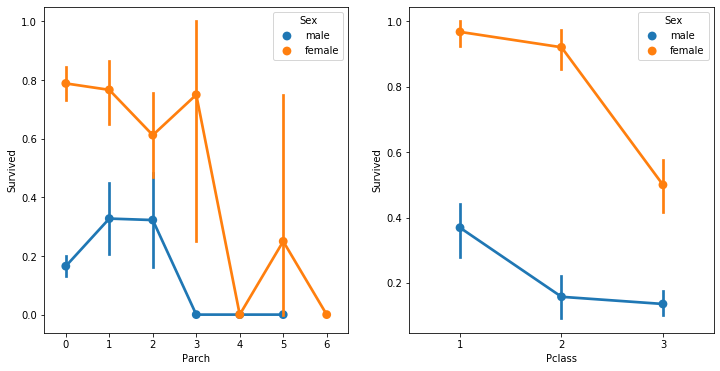

In [42]:
plt.figure(figsize=[12,6])

plt.subplot(121)
#how does family size factor with sex & survival compare
sns.pointplot(x="Parch", y="Survived", hue="Sex", data=train)

#how does class factor with sex & survival compare
plt.subplot(122)
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=train)

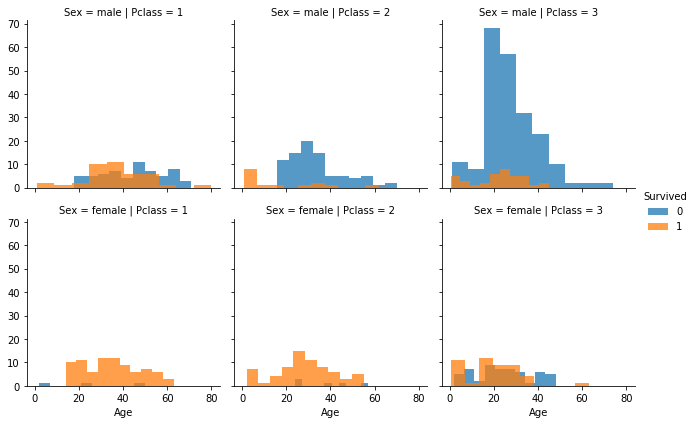

In [43]:
#histogram comparison of sex, class, and age by survival

h = sns.FacetGrid(train, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()

#### 3.22.2 Completing (Imputation - filling missing values)

#### Finding features with Missing values and visualising them

In [44]:
train['Age'].isnull().sum()

177

In [45]:
# make a list of the variables that contain missing values

vars_with_na = [var for var in train.columns if train[var].isnull().sum()>0]

# print the variable name and the percentage of missing values

for var in vars_with_na:
    print("Missing values in train data ", var, '-----Total---', train[var].isnull().sum(),'---', np.round(train[var].isnull().mean(), 3),  '% missing values')

Missing values in train data  Age -----Total--- 177 --- 0.199 % missing values
Missing values in train data  Cabin -----Total--- 687 --- 0.771 % missing values
Missing values in train data  Embarked -----Total--- 2 --- 0.002 % missing values


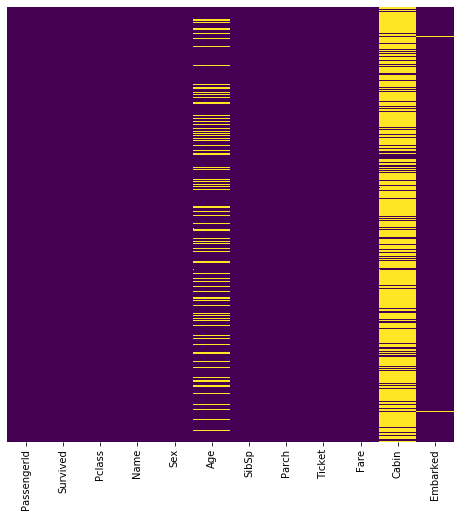

In [46]:
# Visualising NaN values
plt.figure(figsize = (8,8))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [47]:
vars_with_na_test = [var for var in test.columns if test[var].isnull().sum()>0]

for var in vars_with_na_test:
    print("Missing values in test data \n", var, '-----Total---', test[var].isnull().sum(),'---', np.round(test[var].isnull().mean(), 3),  '% missing values')

Missing values in test data 
 Age -----Total--- 86 --- 0.206 % missing values
Missing values in test data 
 Fare -----Total--- 1 --- 0.002 % missing values
Missing values in test data 
 Cabin -----Total--- 327 --- 0.782 % missing values


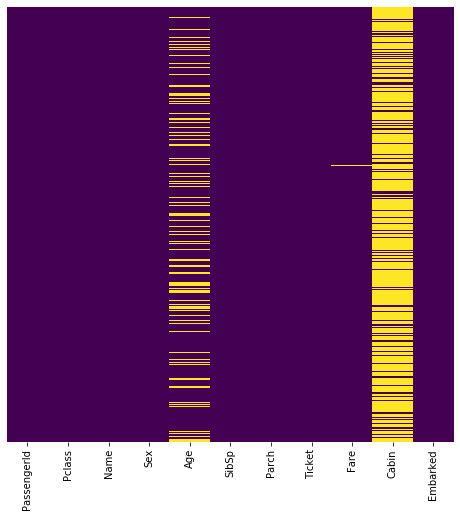

In [48]:
# Visualising NaN values
plt.figure(figsize = (8,8))
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

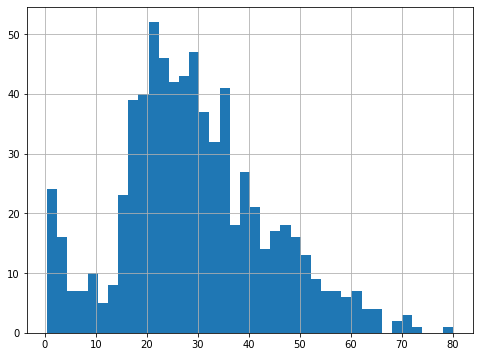

In [49]:
# To fill missing values in 'Age', and  'Fare' lets see their distribution again

train['Age'].hist(figsize = (8,6), bins= 40)
plt.show()

In [50]:
# Its right skewed, therefore its better to fill it with median value, 
# however there are two distinct areas, one from Age 0 to 16, and then 16 to 80

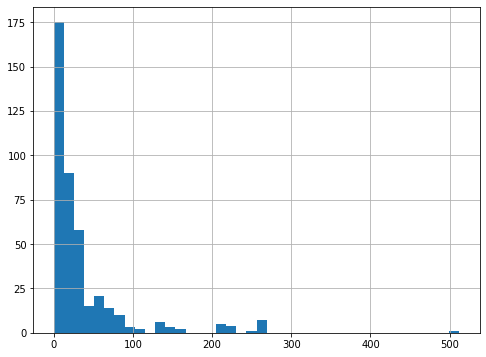

In [51]:
test['Fare'].hist(figsize = (8,6), bins= 40)

In [52]:
# This is also right skewed, lets fill it with median value

In [53]:
# Embarked is a categorical feature

train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [54]:
# its better to fill "Embarked" with most frequent i.e mode ( 'S')

In [55]:
# Cabin. Out of 891 , 687 are missing values, lets fill maissing value with a new label 'H'
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [56]:
# Though there are 687 missing values. We can see that the cabins were in A-G and T series.
# This can relate to survivability. We fill missing values with 'H'
# Missing cabin values can be of people not travelling in cabins.

In [57]:
# Lets explore 'Name' to get some insight for filling missing values in Age
#Extracting title from "Name" using Pandas Series.str.extract() function
for dataset in data:
    for i in dataset['Name']:
        dataset['Title']=dataset['Name'].str.extract('([A-Za-z]+)\.') 
    
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [58]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [59]:
pd.crosstab(test['Title'], test['Sex'])

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [60]:
# It can be seen that Capt, Col, Don, Jonkheer, Major, Rev and Sir are older males and can be grouped with Mr
# countess, Dona & Lady can be grouped with Mrs, Mlle,Mme & Ms can be grouped with Miss
# Lets Dr remain a separate group as it is both male and female
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Rev': 'Mr', 'Mme': 'Miss',
          'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
for dataset in data:
    dataset.replace({'Title': mapping}, inplace=True)

In [61]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Dr,1,6
Master,0,40
Miss,186,0
Mr,0,531
Mrs,127,0


In [62]:
pd.crosstab(test['Title'], test['Sex'])

Sex,female,male
Title,,
Dr,0,1
Master,0,21
Miss,79,0
Mr,0,244
Mrs,73,0


In [63]:
# Now we can fill missing values of of 'Age' of every group with their median values
titles = ['Dr', 'Master', 'Miss', 'Mr', 'Mrs']
for dataset in data:
    for title in titles:
        age_to_impute = dataset.groupby('Title')['Age'].median()[titles.index(title)]
        dataset.loc[(dataset['Age'].isnull()) & (dataset['Title'] == title), 'Age'] = age_to_impute

In [64]:
# Filling missing values of Embarked, Fare and Cabin using fillna method in both train and test

for dataset in data:
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    dataset['Cabin'].fillna('H', inplace = True)

In [65]:
train['Ticket'].nunique(), train['Ticket'].unique()

(681, array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
        '330877', '17463', '349909', '347742', '237736', 'PP 9549',
        '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
        '244373', '345763', '2649', '239865', '248698', '330923', '113788',
        '347077', '2631', '19950', '330959', '349216', 'PC 17601',
        'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
        'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
        'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
        '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
        '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
        '2669', '113572', '36973', '347088', 'PC 17605', '2661',
        'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
        'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
        '248738', '364516', '345767', '345779', '330932', '113059',
        

In [66]:
train.pivot_table(index=['Ticket'], aggfunc='size')

Ticket
110152         3
110413         3
110465         2
110564         1
110813         1
              ..
W./C. 6608     4
W./C. 6609     1
W.E.P. 5734    1
W/C 14208      1
WE/P 5735      2
Length: 681, dtype: int64

In [67]:
# there may not be a correlation between Ticket and survival, 
#however We will use Ticket feature to find common groups/families 

In [68]:
# Lets check for missing values again
for dataset in data:
    print(dataset.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64


In [69]:
# No missing values now in train and test data

### 3.22.3 Creating ( Feature Engineering - Making new features)

#### SibSp and Parch analysis

In [70]:
print(train['SibSp'].value_counts())
print(train['SibSp'].value_counts()/len(train['SibSp']))

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64


In [71]:
print(train['Parch'].value_counts()/len(train))

0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: Parch, dtype: float64


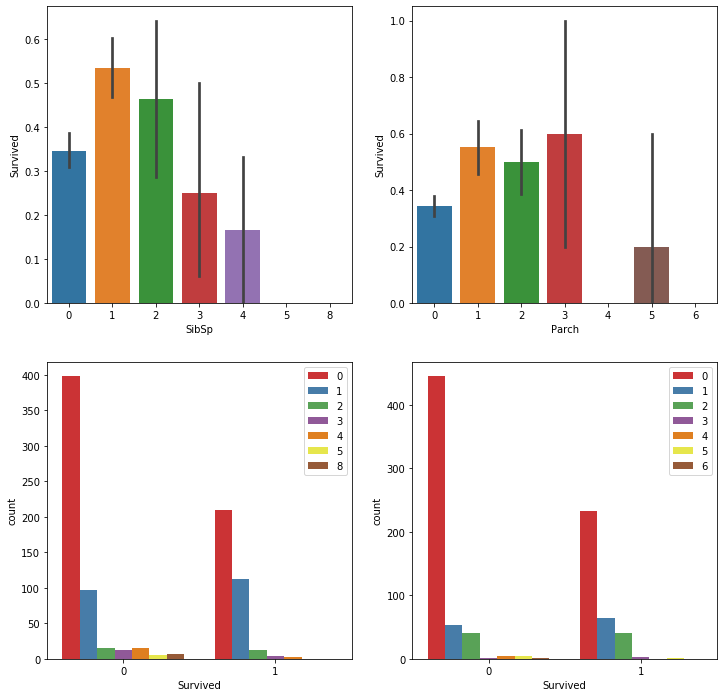

In [72]:
# Lets visualise correlation between SibSp and Parch with 'Survived'

plt.figure(figsize=[12,12])

plt.subplot(221)
sns.barplot(x = 'SibSp', y= 'Survived', data=train)

plt.subplot(222)
sns.barplot(x = 'Parch', y= 'Survived', data=train)

plt.subplot(223)
sns.countplot(x='Survived', hue = 'SibSp', data=train, palette='Set1')
plt.legend(loc='upper right')

plt.subplot(224)
sns.countplot(x='Survived', hue = 'Parch', data=train, palette='Set1')
plt.legend(loc='upper right')
plt.show()

In [73]:
# People traveling alone had worst survivibility
# People with SibSp support of 1 and 2 had better 'Survived' chances
# Similarly people with 1-2 Parch had better 'Survived' chances
# Lets make a column for people traveling alone
#Lets combine them and make a new column 'Family'

In [74]:
for dataset in data:
    dataset['Family'] = dataset ['SibSp'] + dataset ['Parch'] + 1
    dataset['IsAlone'] = 1 #initialize to 1 is alone
    dataset['IsAlone'].loc[dataset['Family'] > 1] = 0 # now update to 0 if family size is greater than 1

/Applications/Utilities/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Applications/Utilities/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [75]:
# Extracting cabin class from cabin number

def cabin_to_deck(name):
    return name['Cabin'][0]

for dataset in data:
    dataset['Cabin'] = dataset.apply(cabin_to_deck,axis=1)
    
train['Cabin'].unique()

array(['H', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

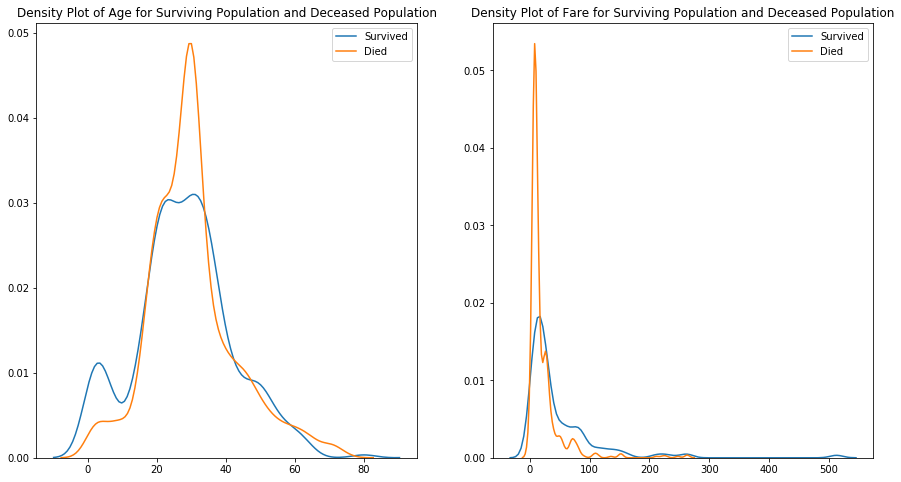

In [76]:
# For making Age and Fare bins, lets see their distribution vis a vis 'Survived' again

plt.figure(figsize=(15,8))
plt.subplot(121)
sns.kdeplot(train["Age"][train.Survived == 1])
sns.kdeplot(train["Age"][train.Survived == 0])
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')

plt.subplot(122)
sns.kdeplot(train["Fare"][train.Survived == 1])
sns.kdeplot(train["Fare"][train.Survived == 0])
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
plt.show();

In [77]:
# making Age and Fare bins
for dataset in data:
#Fare Bins/Buckets using qcut or frequency bins
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 5)

    #Age Bins/Buckets using cut or value bins
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)

In [78]:
train['FareBin'].unique()

[(-0.001, 7.854], (39.688, 512.329], (7.854, 10.5], (10.5, 21.679], (21.679, 39.688]]
Categories (5, interval[float64]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]

In [79]:
train['AgeBin'].unique()

[(16.0, 32.0], (32.0, 48.0], (48.0, 64.0], (-0.08, 16.0], (64.0, 80.0]]
Categories (5, interval[float64]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] < (64.0, 80.0]]

### As there is high correlation between people travelling with family and group with 'Survived', lets make new columns for them by identifying people with tickets(common tickets mens group)

First we will find family by common last name and fare (as they would have paid same Fare)

We find group by finding common ticket 

In [80]:
data_df = train.append(test)

In [81]:
# Finding family on basis of common last name and same fare

data_df['Last_Name'] = data_df['Name'].apply(lambda x: str.split(x, ",")[0])


DEFAULT_SURVIVAL_VALUE = 0.5 # As there is 50% probability of 'Survived' (Binary problem)
data_df['Family_Survival'] = DEFAULT_SURVIVAL_VALUE

for grp, grp_df in data_df[['Survived','Name', 'Last_Name', 'Fare', 'Ticket', 'PassengerId',
                           'SibSp', 'Parch', 'Age', 'Cabin']].groupby(['Last_Name', 'Fare']):
    
    if (len(grp_df) != 1):
        # A Family group is found.
        for ind, row in grp_df.iterrows():
            smax = grp_df.drop(ind)['Survived'].max()
            smin = grp_df.drop(ind)['Survived'].min()
            passID = row['PassengerId']
            if (smax == 1.0):
                data_df.loc[data_df['PassengerId'] == passID, 'Family_Survival'] = 1
            elif (smin==0.0):
                data_df.loc[data_df['PassengerId'] == passID, 'Family_Survival'] = 0

print("Number of passengers with family survival information:", 
      data_df.loc[data_df['Family_Survival']!=0.5].shape[0])

Number of passengers with family survival information: 420


In [82]:
sort_by_last_name = data_df.sort_values('Last_Name')
sort_by_last_name.isnull().sum()

PassengerId          0
Survived           418
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin                0
Embarked             0
Title                0
Family               0
IsAlone              0
FareBin              0
AgeBin               0
Last_Name            0
Family_Survival      0
dtype: int64

In [83]:
data_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family,IsAlone,FareBin,AgeBin,Last_Name,Family_Survival
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,H,S,Mr,2,0,"(-0.001, 7.854]","(16.0, 32.0]",Braund,0.5
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,2,0,"(39.688, 512.329]","(32.0, 48.0]",Cumings,0.5
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,H,S,Miss,1,1,"(7.854, 10.5]","(16.0, 32.0]",Heikkinen,0.5
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,2,0,"(39.688, 512.329]","(32.0, 48.0]",Futrelle,0.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,H,S,Mr,1,1,"(7.854, 10.5]","(32.0, 48.0]",Allen,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,29.0,0,0,A.5. 3236,8.0500,H,S,Mr,1,1,"(7.796, 11.342]","(15.2, 30.4]",Spector,0.5
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,Mrs,1,1,"(46.34, 512.329]","(30.4, 45.6]",Oliva y Ocana,0.5
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,H,S,Mr,1,1,"(-0.001, 7.796]","(30.4, 45.6]",Saether,0.5
416,1308,NaN,3,"Ware, Mr. Frederick",male,29.0,0,0,359309,8.0500,H,S,Mr,1,1,"(7.796, 11.342]","(15.2, 30.4]",Ware,0.5


In [84]:
# Finding group on basis of common ticket

for _, grp_df in data_df.groupby('Ticket'):
    if (len(grp_df) != 1):
        for ind, row in grp_df.iterrows():
            if (row['Family_Survival'] == 0) | (row['Family_Survival']== 0.5):
                smax = grp_df.drop(ind)['Survived'].max()
                smin = grp_df.drop(ind)['Survived'].min()
                passID = row['PassengerId']
                if (smax == 1.0):
                    data_df.loc[data_df['PassengerId'] == passID, 'Family_Survival'] = 1
                elif (smin==0.0):
                    data_df.loc[data_df['PassengerId'] == passID, 'Family_Survival'] = 0
                        
print("Number of passenger with family/group survival information: " 
      +str(data_df[data_df['Family_Survival']!=0.5].shape[0]))

# # Family_Survival in TRAIN_DF and TEST_DF:
train['Family_Survival'] = data_df['Family_Survival'][:891]
test['Family_Survival'] = data_df['Family_Survival'][891:]

Number of passenger with family/group survival information: 546


In [85]:
train.info()
test.info()
train.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PassengerId      891 non-null    int64   
 1   Survived         891 non-null    int64   
 2   Pclass           891 non-null    int64   
 3   Name             891 non-null    object  
 4   Sex              891 non-null    object  
 5   Age              891 non-null    float64 
 6   SibSp            891 non-null    int64   
 7   Parch            891 non-null    int64   
 8   Ticket           891 non-null    object  
 9   Fare             891 non-null    float64 
 10  Cabin            891 non-null    object  
 11  Embarked         891 non-null    object  
 12  Title            891 non-null    object  
 13  Family           891 non-null    int64   
 14  IsAlone          891 non-null    int64   
 15  FareBin          891 non-null    category
 16  AgeBin           891 non-null    category
 1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family,IsAlone,FareBin,AgeBin,Family_Survival
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,H,S,Mr,2,0,"(-0.001, 7.854]","(16.0, 32.0]",0.5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,2,0,"(39.688, 512.329]","(32.0, 48.0]",0.5
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,H,S,Miss,1,1,"(7.854, 10.5]","(16.0, 32.0]",0.5
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,2,0,"(39.688, 512.329]","(32.0, 48.0]",0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,H,S,Mr,1,1,"(7.854, 10.5]","(32.0, 48.0]",0.5


#### 3.22.4 Converting

In [86]:
# Sex
for dataset in data:
    dataset['Sex'].replace(['male','female'],[0,1],inplace=True) #can be done by pandas 'get_dummies' method

In [87]:
# 'Embarked', 'Title', 'AgeBin', 'FareBin' and 'CabinCode' using label encoding
label = LabelEncoder()
for dataset in data:    
    
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])
    dataset['Cabin_Code'] = label.fit_transform(dataset['Cabin'])

In [88]:
train.columns, test.columns

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Family',
        'IsAlone', 'FareBin', 'AgeBin', 'Family_Survival', 'Embarked_Code',
        'Title_Code', 'AgeBin_Code', 'FareBin_Code', 'Cabin_Code'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Family', 'IsAlone',
        'FareBin', 'AgeBin', 'Family_Survival', 'Embarked_Code', 'Title_Code',
        'AgeBin_Code', 'FareBin_Code', 'Cabin_Code'],
       dtype='object'))

In [89]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family,IsAlone,FareBin,AgeBin,Family_Survival,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code,Cabin_Code
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,H,S,Mr,2,0,"(-0.001, 7.854]","(16.0, 32.0]",0.5,2,3,1,0,7
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,C,Mrs,2,0,"(39.688, 512.329]","(32.0, 48.0]",0.5,0,4,2,4,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,H,S,Miss,1,1,"(7.854, 10.5]","(16.0, 32.0]",0.5,2,2,1,1,7
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C,S,Mrs,2,0,"(39.688, 512.329]","(32.0, 48.0]",0.0,2,4,2,4,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,H,S,Mr,1,1,"(7.854, 10.5]","(32.0, 48.0]",0.5,2,3,2,1,7


### Lets drop PassengerId, Name, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Title, FareBin, AgeBin as we have taken insights from them to make new columns

In [90]:
train_orig = train.drop(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket','Fare', 'Cabin', 'Embarked', 
                         'Title', 'FareBin','AgeBin'], axis =1)
test_orig = test.drop(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket','Fare', 'Cabin', 'Embarked', 
                         'Title', 'FareBin','AgeBin'], axis =1)
train_master = train_orig.copy(deep = True)
test_master = test_orig.copy(deep = True)

In [91]:
print(train_orig.columns,test_orig.columns, train_orig.shape, test_orig.shape )

Index(['Survived', 'Pclass', 'Sex', 'Family', 'IsAlone', 'Family_Survival',
       'Embarked_Code', 'Title_Code', 'AgeBin_Code', 'FareBin_Code',
       'Cabin_Code'],
      dtype='object') Index(['Pclass', 'Sex', 'Family', 'IsAlone', 'Family_Survival',
       'Embarked_Code', 'Title_Code', 'AgeBin_Code', 'FareBin_Code',
       'Cabin_Code'],
      dtype='object') (891, 11) (418, 10)


#### Feature Selection

In [92]:
X_orig=train_orig.drop('Survived' , axis =1) #(with cabin, title and embarked info)
y_orig=train_orig['Survived']

In [93]:
# Splitting in to X_train, X_test, y_train and y_test

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_orig, y_orig, test_size= 0.3, 
                                                                    random_state = 0)

In [94]:
# Feature Selection using 'Constant Features' (Variance Thresold)

In [95]:
sel1_ = VarianceThreshold(threshold=0)
sel1_.fit(X_train)

VarianceThreshold(threshold=0)

In [96]:
#get_support() is a boolean vector that indicates which features are retained
sum(sel1_.get_support())

10

In [97]:
print([x for x in X_train.columns if x not in X_train.columns[sel1_.get_support()]])

[]


In [98]:
# No column removed

In [99]:
# Using 'Quasi-constant Features' method

In [100]:
sel1_ = VarianceThreshold(threshold=0.01)
sel1_.fit(X_train)

VarianceThreshold(threshold=0.01)

In [101]:
sum(sel1_.get_support())

10

In [102]:
# No column removed by 'Constant Features' and 'Quasi-constant Features' (Variance Thresold)

In [103]:
# Using 'Filter Methods - Correlation'

In [104]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(0, len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [105]:
corr_mat = X_train.corr()
corr_mat

,Pclass,Sex,Family,IsAlone,Family_Survival,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code,Cabin_Code
Pclass,1.000000,-0.147815,0.078809,0.135575,-0.307570,0.136893,-0.108782,-0.359409,-0.708374,0.752958
Sex,-0.147815,1.000000,0.190767,-0.297729,0.058025,-0.114605,0.007143,-0.026124,0.247797,-0.136342
Family,0.078809,0.190767,1.000000,-0.679144,-0.140954,0.082246,-0.216647,-0.206111,0.416492,0.037207
IsAlone,0.135575,-0.297729,-0.679144,1.000000,-0.096504,0.028139,0.026997,0.093040,-0.519818,0.115881
Family_Survival,-0.307570,0.058025,-0.140954,-0.096504,1.000000,-0.116467,0.009720,0.111817,0.189501,-0.296022
Embarked_Code,0.136893,-0.114605,0.082246,0.028139,-0.116467,1.000000,0.013170,-0.011604,-0.091022,0.181267
Title_Code,-0.108782,0.007143,-0.216647,0.026997,0.009720,0.013170,1.000000,0.432305,0.009444,-0.044590
AgeBin_Code,-0.359409,-0.026124,-0.206111,0.093040,0.111817,-0.011604,0.432305,1.000000,0.150437,-0.271919
FareBin_Code,-0.708374,0.247797,0.416492,-0.519818,0.189501,-0.091022,0.009444,0.150437,1.000000,-0.552064
Cabin_Code,0.752958,-0.136342,0.037207,0.115881,-0.296022,0.181267,-0.044590,-0.271919,-0.552064,1.000000


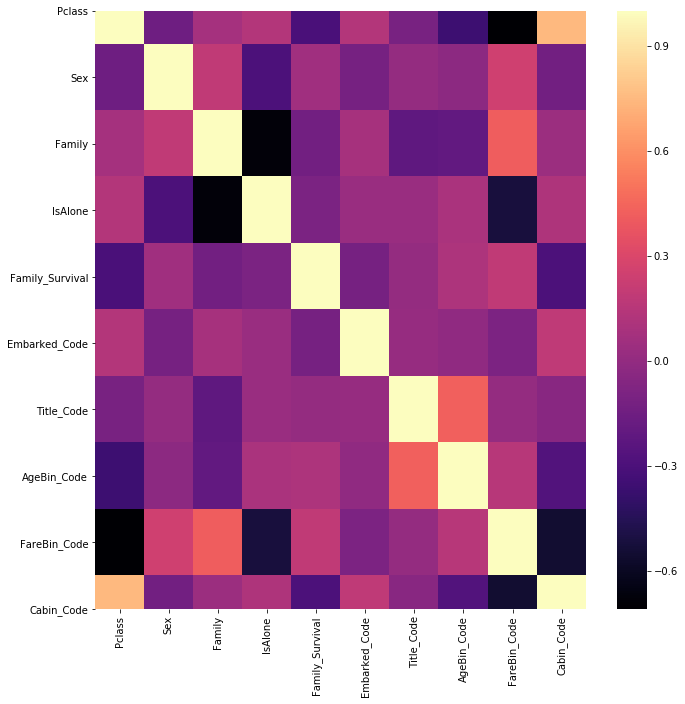

In [106]:
corr_mat1 = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corr_mat1, cmap='magma');

In [107]:
corr_features1 = correlation(X_train, 0.8)
len(set(corr_features1))

0

In [108]:
corr_features1

set()

In [109]:
# No column removed by Correlation method

In [110]:
# Checking multicolinearity with VIF (Variance Inflation Factor)

# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [111]:
calc_vif(X_train)

,variables,VIF
0,Pclass,26.993159
1,Sex,1.687833
2,Family,6.259179
3,IsAlone,4.482871
4,Family_Survival,3.657838
5,Embarked_Code,5.328817
6,Title_Code,17.243232
7,AgeBin_Code,5.080548
8,FareBin_Code,7.075390
9,Cabin_Code,20.502624


In [112]:
# Lets check after droppping 'Cabin_Code', 'Title_Code'
X_train1 = X_train.drop(['Cabin_Code', 'Title_Code'], axis=1)
X_test1 = X_test.drop(['Cabin_Code', 'Title_Code'], axis=1)
calc_vif(X_train1)
X_test1.columns

Index(['Pclass', 'Sex', 'Family', 'IsAlone', 'Family_Survival',
       'Embarked_Code', 'AgeBin_Code', 'FareBin_Code'],
      dtype='object')

In [113]:
#Lets check accuracy on X_train and X_train1

def run_randomForests_classification(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=0, max_depth=4)
    rf.fit(X_train, y_train)
    
    print('Train Set')
    pred = rf.predict_proba(X_train)
    print("Train Results roc-auc {}".format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test Set')
    pred= rf.predict_proba(X_test)
    print("Test Results roc-auc {}".format(roc_auc_score(y_test, pred[:,1])))

In [114]:
run_randomForests_classification(X_train, X_test, y_train, y_test)

Train Set
Train Results roc-auc 0.9020411704735254
Test Set
Test Results roc-auc 0.9034226190476191


In [115]:
run_randomForests_classification(X_train1, X_test1, y_train, y_test)

Train Set
Train Results roc-auc 0.9014934600117134
Test Set
Test Results roc-auc 0.8942261904761905


In [116]:
# On training data roc-auc accuracy is similar, however on test data, it has decreased by around 1%

In [117]:
# Using Wrapper Methods

# 1. Step Forward Feature Selection

In [118]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [119]:
import warnings
warnings.filterwarnings('ignore')

In [120]:
sfs1 = SFS(RandomForestClassifier(n_jobs=-1),
          k_features=10,
          forward=True,
          floating=False,
          verbose=2,
          scoring='roc_auc',
          cv=3)
sfs1 = sfs1.fit(X_train.values, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   11.6s finished

[2020-08-25 20:15:02] Features: 1/10 -- score: 0.7935683386798873[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    7.4s finished

[2020-08-25 20:15:09] Features: 2/10 -- score: 0.8480051683354395[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    6.8s finished

[2020-08-25 20:15:16] Features: 3/10 -- score: 0.8820821587116425[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [121]:
selected_feat = X_train.columns[list(sfs1.k_feature_idx_)]
print(selected_feat)

Index(['Pclass', 'Sex', 'Family', 'IsAlone', 'Family_Survival',
       'Embarked_Code', 'Title_Code', 'AgeBin_Code', 'FareBin_Code',
       'Cabin_Code'],
      dtype='object')


In [122]:
# No column removed by this

In [123]:
#2. Step Backward Feature Selection¶


In [124]:
sfs2 = SFS(RandomForestClassifier(n_jobs=8),
          k_features = 7,
          forward = False,
          floating=False,
          verbose=2,
          scoring='roc_auc',
          cv=3)

sfs2 = sfs2.fit(X_train.values, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.1s finished

[2020-08-25 20:15:50] Features: 9/7 -- score: 0.86102807750883[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    7.8s finished

[2020-08-25 20:15:58] Features: 8/7 -- score: 0.8673110884287613[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   10.1s finished

[2020-08-25 20:16:08] Features: 7/7 -- score: 0.8831425585690678

In [125]:
selected_feat = X_train.columns[list(sfs2.k_feature_idx_)]
print(selected_feat)

Index(['Pclass', 'Sex', 'Family', 'IsAlone', 'Family_Survival', 'Title_Code',
       'FareBin_Code'],
      dtype='object')


In [126]:
# It has removed 'Embarked_Code', , 'AgeBin_Code', and 'Cabin_Code'

In [127]:
#Lets check accuracy with this
run_randomForests_classification(X_train[selected_feat], X_test[selected_feat], y_train, y_test)

Train Set
Train Results roc-auc 0.8939556625669726
Test Set
Test Results roc-auc 0.8984226190476191


In [128]:
# Accuracy has decreased by 1% on both train and test data

In [129]:
# Exhaustive Feature Selection
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [130]:
efs1 = EFS(RandomForestClassifier(n_jobs=-1, random_state=0),
          min_features=1,
          max_features=7,
          scoring='roc_auc',
          print_progress=True,
          cv=2)
efs1 = efs1.fit(X_train.values, y_train)

Features: 967/967

In [131]:
selected_feat = X_train.columns[list(efs1.best_idx_)]
print(selected_feat)

Index(['Pclass', 'Sex', 'Family_Survival', 'Embarked_Code', 'Title_Code'], dtype='object')


In [132]:
# It has removed 'Family', 'IsAlone', 'FareBin_Code', , 'AgeBin_Code', and 'Cabin_Code'

In [133]:
run_randomForests_classification(X_train[selected_feat], X_test[selected_feat], y_train, y_test)

Train Set
Train Results roc-auc 0.8969436671655713
Test Set
Test Results roc-auc 0.8938690476190476


### Embedded Methods
1. Regularization

In [134]:
from sklearn.linear_model import Lasso, LogisticRegression, LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [135]:
scalar = StandardScaler()
scalar.fit(X_train.values)

StandardScaler()

In [136]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1',solver='liblinear'))
sel_.fit(scalar.transform(X_train.values), y_train)

SelectFromModel(estimator=LogisticRegression(C=1, penalty='l1',
                                             solver='liblinear'))

In [137]:
sel_.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [138]:
selected_feat = X_train.columns[sel_.get_support()]
selected_feat

Index(['Pclass', 'Sex', 'Family', 'IsAlone', 'Family_Survival',
       'Embarked_Code', 'Title_Code', 'AgeBin_Code', 'FareBin_Code',
       'Cabin_Code'],
      dtype='object')

In [139]:
# No column removed by this

### Tree Method

In [140]:
sel_ = SelectFromModel(RandomForestClassifier(n_estimators=400))
sel_.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=400))

In [141]:
selected_feat = X_train.columns[sel_.get_support()]
selected_feat

Index(['Sex', 'Family_Survival', 'Title_Code'], dtype='object')

In [142]:
X_train4 = sel_.transform(X_train)
X_test4 = sel_.transform(X_test)
print(X_train4.shape, X_test4.shape)

(623, 3) (268, 3)


In [143]:
#Original data
run_randomForests_classification(X_train, X_test, y_train, y_test)

Train Set
Train Results roc-auc 0.9020411704735254
Test Set
Test Results roc-auc 0.9034226190476191


In [144]:
#new data
run_randomForests_classification(X_train4, X_test4, y_train, y_test)

Train Set
Train Results roc-auc 0.8597752760243812
Test Set
Test Results roc-auc 0.8675595238095237


In [145]:
# Accuracy has decreased in both train and testby 3%

In [146]:
###  Lets summarise feature selection by all methods
##### By 'Constant Features' and 'Quasi Constant Featrures'(Variance Thresold) - No column removed
##### By correlation -  No column removed
##### By Multicollinearity- with VIF (Variance Inflation Factor)- 'Title_Code', 'Cabin_Code'
##### by Fliter (Statistical and Ranking Methods) - No column removed
##### Using Wrapper Methods, Step Forward Feature Selection - No column removed
                
    
##### Using Wrapper Methods, Step Backward Feature Selection¶ -'Cabin_Code', 'Embarked_Code', 'AgeBin_Code'
  columns kept = 'Pclass', 'Sex', 'Family', 'IsAlone', 'Family_Survival', 'Title_Code',
       'FareBin_Code'
    
##### Exhaustive Feature Selection- Removed 'Family', 'IsAlone', 'FareBin_Code', , 'AgeBin_Code', and 'Cabin_Code'
  columns kept = ['Pclass', 'Sex', 'Family_Survival', 'Embarked_Code', 'Title_Code']
    
##### Using  Embedded (Regularisation method)- No column removed
        
##### Using  Embedded (Tree method)
  columns kept = ['Sex', 'Family_Survival', 'Title_Code']

IndentationError: unexpected indent (<ipython-input-146-1329634c07bb>, line 10)

In [156]:
# Pclass	Sex	 Family 	Family_Survival	 FareBin_Code	AgeBin_Code

In [157]:
# I have taken VIF (Multicollinearity) in consideration and removed 'Title_Code', 'Cabin_Code'
train_orig.columns

Index(['Survived', 'Pclass', 'Sex', 'Family', 'IsAlone', 'Family_Survival',
       'Embarked_Code', 'Title_Code', 'AgeBin_Code', 'FareBin_Code',
       'Cabin_Code'],
      dtype='object')

In [158]:
train_FS =  train_orig.drop(['Title_Code', 'Cabin_Code'],axis=1)
test_FS =  train_orig.drop (['Title_Code', 'Cabin_Code'], axis=1)

In [159]:
X_orig=train_FS.drop('Survived' , axis =1) #(with cabin, title and embarked info)
y_orig=train_FS['Survived']

### Splitting data in train and test

In [160]:
### Splitting and making train and test dataset to check accuracy

In [161]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_orig, y_orig, test_size= 0.3, random_state = 0)

In [162]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(623, 8) (268, 8) (623,) (268,)


In [163]:
X_train.head()

,Pclass,Sex,Family,IsAlone,Family_Survival,Embarked_Code,AgeBin_Code,FareBin_Code
857,1,0,1,1,0.5,2,3,3
52,1,1,2,0,1.0,0,3,4
386,3,0,8,0,0.0,2,0,4
124,1,0,2,0,0.0,2,3,4
578,3,1,2,0,0.5,0,2,2


In [164]:
### Standardisation
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

## Step 4: Perform Exploratory Analysis with Statistics

In [165]:
# Lets do statistical analysis and visualisation on these selected columns
train_FS.columns

Index(['Survived', 'Pclass', 'Sex', 'Family', 'IsAlone', 'Family_Survival',
       'Embarked_Code', 'AgeBin_Code', 'FareBin_Code'],
      dtype='object')

In [166]:
#Discrete Variable Correlation by Survival using
#group by aka pivot table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html
data1_x = ['Pclass', 'Sex', 'Family', 'IsAlone', 'Family_Survival',
       'Embarked_Code', 'AgeBin_Code', 'FareBin_Code']
Target = ['Survived']
for x in data1_x:
    if train_FS[x].dtype != 'float64' :
        print('Survival Correlation by:', x)
        print(train_FS[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Sex
   Sex  Survived
0    0  0.188908
1    1  0.742038
---------- 

Survival Correlation by: Family
   Family  Survived
0       1  0.303538
1       2  0.552795
2       3  0.578431
3       4  0.724138
4       5  0.200000
5       6  0.136364
6       7  0.333333
7       8  0.000000
8      11  0.000000
---------- 

Survival Correlation by: IsAlone
   IsAlone  Survived
0        0  0.505650
1        1  0.303538
---------- 

Survival Correlation by: Embarked_Code
   Embarked_Code  Survived
0              0  0.553571
1              1  0.389610
2              2  0.339009
---------- 

Survival Correlation by: AgeBin_Code
   AgeBin_Code  Survived
0            0  0.548077
1            1  0.328032
2            2  0.436275
3            3  0.434783
4            4  0.090909
---------- 

Survival Correlation by: FareBin_Code
   FareBin_Code  Survived
0   

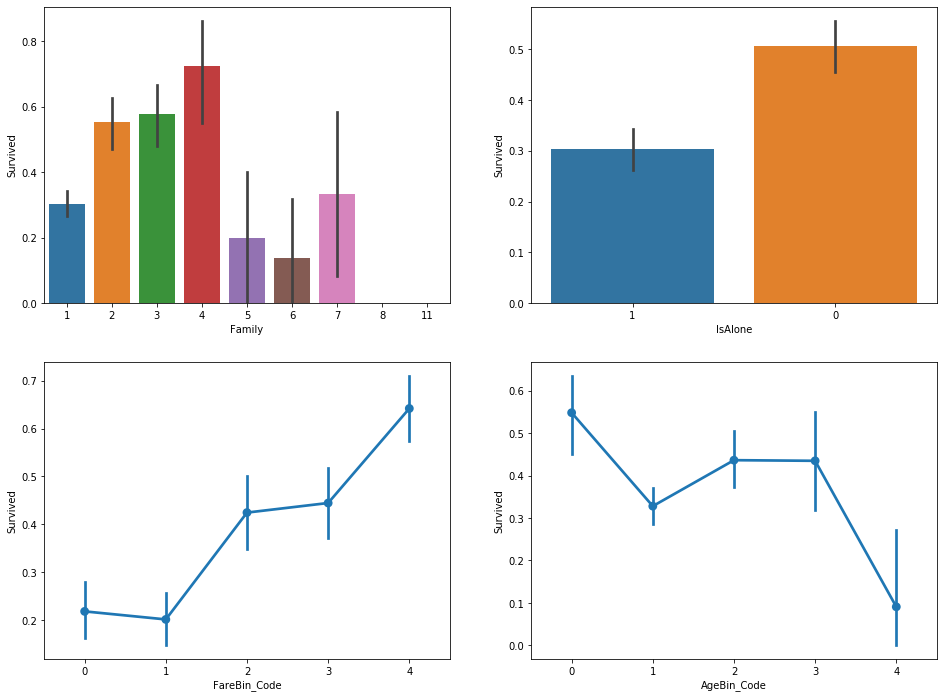

In [167]:
fig, saxis = plt.subplots(2, 2,figsize=(16,12))

sns.barplot(x = 'Family', y = 'Survived', data=train_orig, ax = saxis[0,0])
sns.barplot(x = 'IsAlone', y = 'Survived', order=[1,0], data=train_orig, ax = saxis[0,1])

sns.pointplot(x = 'FareBin_Code', y = 'Survived',  data=train_orig, ax = saxis[1,0])
sns.pointplot(x = 'AgeBin_Code', y = 'Survived',  data=train_orig, ax = saxis[1,1])

In [168]:
# For 'Family', survivability increased upto size of 4, and then decreased
# For 'IsAlone', singletons had less survivability in comparison to people in a group
# For 'FareBin_Code', survivability inreased with Fare
# For 'AgeBin_Code', survivability decreased initially, then increase, became constant and then decreased

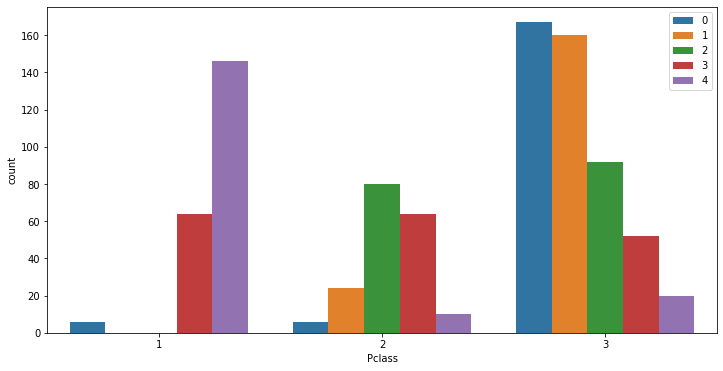

In [169]:
plt.figure(figsize=(12,6))

sns.countplot(x = 'Pclass', hue = 'FareBin_Code' , data=train)
plt.legend(loc='upper right')
plt.show()

In [170]:
# Pclass 1 had mostly higher Fare, with few less Fares(Is it for servants?)
# Pclass2 had all Fares
# Pclass3 had maximum Fares from lower bracket, and few with higher bracket ( last timers getting ticket?)

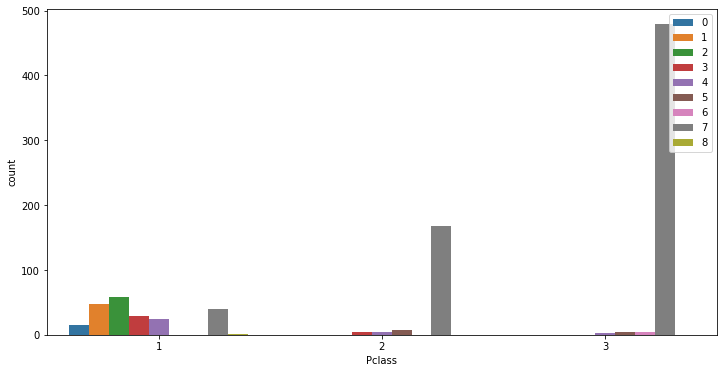

In [171]:
plt.figure(figsize=(12,6))

sns.countplot(x = 'Pclass', hue = 'Cabin_Code' , data=train_orig)
plt.legend(loc='upper right')
plt.show()

In [172]:
# Pclass1 had very less missing values. Pclass3 had most missing values (max people without any cabin?)

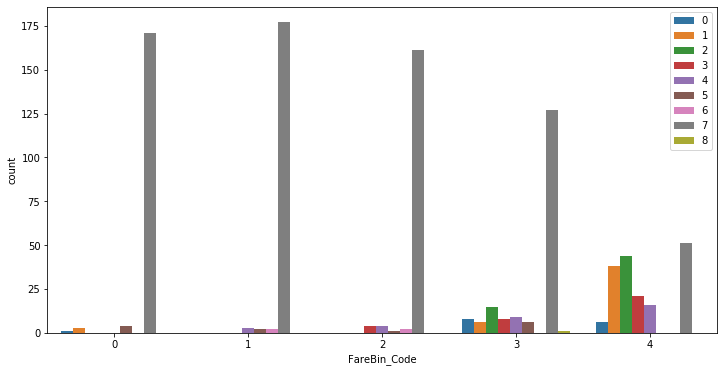

In [173]:
plt.figure(figsize=(12,6))

sns.countplot(x = 'FareBin_Code', hue = 'Cabin_Code' , data=train_orig)
plt.legend(loc='upper right')
plt.show()

In [174]:
# Same carobarated by this. People in FareBin_Code 0-3 had max missing values

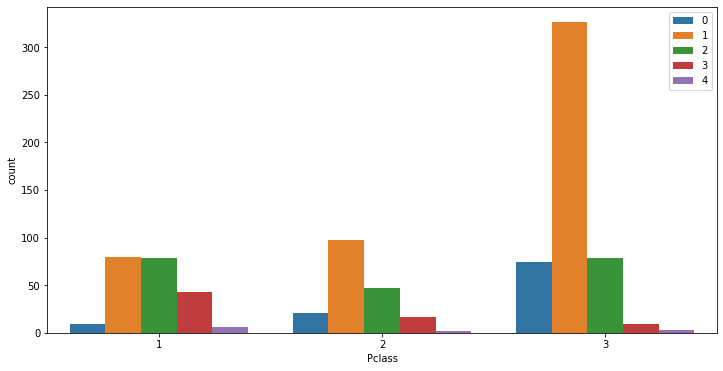

In [175]:
plt.figure(figsize=(12,6))

sns.countplot(x = 'Pclass', hue = 'AgeBin_Code' , data=train_orig)
plt.legend(loc='upper right')
plt.show()

In [176]:
# Age distribution Pclass wise

### Step 5: Model Data

In [177]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]

In [178]:
#Lets use the below function to find accuracy, Precision and recall score

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, \
precision_recall_curve, roc_curve, accuracy_score, classification_report

def print_score(clf, X_train, y_train):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''

    
    clf.fit(X_train, y_train)
    clf.predict(X_train)
    
    print("Train Result:\n")
    print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
    print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
    print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

    res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    mean_res = np.mean(res)
    print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
    print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

In [179]:
for clf in MLA:
    print(clf)
    print('-'*20)
    print_score(clf, X_train, y_train)
    print('-'*20)

AdaBoostClassifier()
--------------------
Train Result:

accuracy score: 0.8331

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       381
           1       0.81      0.74      0.78       242

    accuracy                           0.83       623
   macro avg       0.83      0.82      0.82       623
weighted avg       0.83      0.83      0.83       623


Confusion Matrix: 
 [[339  42]
 [ 62 180]]

Average Accuracy: 	 0.8170
Accuracy SD: 		 0.0345
--------------------
BaggingClassifier()
--------------------
Train Result:

accuracy score: 0.8989

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       381
           1       0.90      0.83      0.87       242

    accuracy                           0.90       623
   macro avg       0.90      0.89      0.89       623
weighted avg       0.90      0.90      0.90       623


Confusion Matrix: 

In [180]:
#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = 10

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters', 'Train Accuracy Mean', 'Train Accuracy *STD' ,'Test Accuracy','MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, X_train, y_train, cv  = 20)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    #MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'Train Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'Train Accuracy *STD'] = cv_results['test_score'].std()   #let's know the worst that can happen!
    

    #save MLA predictions 
    alg.fit(X_train, y_train)
    MLA_compare.loc[row_index, 'Test Accuracy'] = accuracy_score(y_test, alg.predict(X_test))
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['Train Accuracy Mean'], ascending = False, inplace = True)
MLA_compare


,MLA Name,MLA Parameters,Train Accuracy Mean,Train Accuracy *STD,Test Accuracy,MLA Time
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.842944,0.0486756,0.839552,0.0368995
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.841331,0.0552879,0.839552,0.0431209
20,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.836643,0.050989,0.839552,0.0458433
8,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.834879,0.0532394,0.809701,0.00311979
18,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.834879,0.0532394,0.809701,0.00184468
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.830192,0.0561778,0.843284,0.100546
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.828478,0.0458379,0.828358,0.183854
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.828478,0.0643729,0.809701,0.184344
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.823589,0.0681879,0.809701,0.0951262
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.820514,0.0488214,0.839552,0.185475


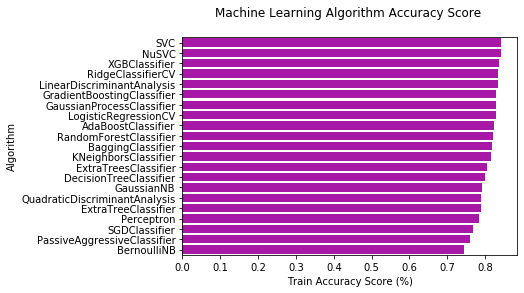

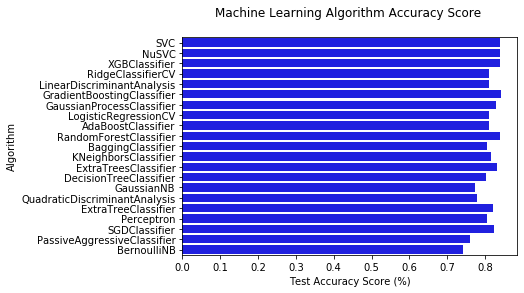

In [181]:
# Visualisation of the same with barplot
figsize = (24,24)

sns.barplot(x='Train Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm');
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Train Accuracy Score (%)')
plt.ylabel('Algorithm')
plt.show()

sns.barplot(x='Test Accuracy', y = 'MLA Name', data = MLA_compare, color = 'b');
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Test Accuracy Score (%)')
plt.ylabel('Algorithm')
plt.show()

### 5.12 Tune Model with Hyper-Parameters

In [182]:
# We are getting best results by SVC and GradientBoostingClassifier in training and test respectively
# Lets tune SVC hyperparameters for the best result

# Lets check accuracy with SVC after tuning its hyperparameters

svc = svm.SVC(probability=True)

grid_n_estimator = [10, 50, 100, 300]
grid_ratio = [.1, .25, .5, .75, 1.0]
grid_learn = [.01, .03, .05, .1, .25]
grid_max_depth = [2, 4, 6, 8, 10, None]
grid_min_samples = [5, 10, .03, .05, .10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]

params = {
            'C': [1,2,3,4,5], #default=1.0
            'gamma': grid_ratio, #edfault: auto
            'decision_function_shape': ['ovo', 'ovr'], #default:ovr
            'probability': [True],
            'random_state': grid_seed
             }

clf_svc = GridSearchCV(svc, param_grid=params, cv= 3)

clf_svc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(probability=True),
             param_grid={'C': [1, 2, 3, 4, 5],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': [0.1, 0.25, 0.5, 0.75, 1.0],
                         'probability': [True], 'random_state': [0]})

In [183]:
clf_svc.best_estimator_

SVC(C=1, decision_function_shape='ovo', gamma=0.1, probability=True,
    random_state=0)

In [184]:
svc_model = svm.SVC(C=1, decision_function_shape='ovo', gamma=0.1, probability=True,random_state=0)
svc_model.fit(X_train, y_train)

y_pred1 = svc_model.predict(X_train)

print("Train Result:\n")
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, y_pred1)))
print("Classification Report: \n {}\n".format(classification_report(y_train, y_pred1)))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, y_pred1)))
print('*'*50)
y_pred = svc_model.predict(X_test)


print("Test Result:\n")
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, y_pred)))
print("Classification Report: \n {}\n".format(classification_report(y_test, y_pred)))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, y_pred)))

Train Result:

accuracy score: 0.8523

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.94      0.89       381
           1       0.88      0.71      0.79       242

    accuracy                           0.85       623
   macro avg       0.86      0.83      0.84       623
weighted avg       0.86      0.85      0.85       623


Confusion Matrix: 
 [[358  23]
 [ 69 173]]

**************************************************
Test Result:

accuracy score: 0.8433

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       168
           1       0.85      0.70      0.77       100

    accuracy                           0.84       268
   macro avg       0.85      0.81      0.83       268
weighted avg       0.84      0.84      0.84       268


Confusion Matrix: 
 [[156  12]
 [ 30  70]]



In [185]:
### Tuning hyperparameters of GradientBoostingClassifier

In [186]:
# Lets check accuracy with GradientBoostingClassifier after tuning its hyperparameters

from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=4,
                                                  max_features='sqrt',
                                                  random_state=10,
                                                  subsample=1),
             iid=False, n_jobs=4,
             param_grid={'learning_rate': [0.15, 0.1, 0.05, 0.01, 0.005, 0.001],
                         'n_estimators': [100, 250, 500, 750, 1000, 1250, 1500,
                                          1750]},
             scoring='accuracy')

In [187]:
tuning.best_estimator_

GradientBoostingClassifier(learning_rate=0.005, max_depth=4,
                           max_features='sqrt', n_estimators=750,
                           random_state=10, subsample=1)

In [188]:
GBC = GradientBoostingClassifier(learning_rate=0.005, max_depth=4,
                           max_features='sqrt', n_estimators=750,
                           random_state=10, subsample=1)

GBC.fit(X_train, y_train)
y_pred1 = GBC.predict(X_train)

print("Train Result:\n")
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, y_pred1)))
print("Classification Report: \n {}\n".format(classification_report(y_train, y_pred1)))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, y_pred1)))
print('*'*50)
y_pred = GBC.predict(X_test)


print("Test Result:\n")
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, y_pred)))
print("Classification Report: \n {}\n".format(classification_report(y_test, y_pred)))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, y_pred)))

Train Result:

accuracy score: 0.8636

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       381
           1       0.89      0.74      0.81       242

    accuracy                           0.86       623
   macro avg       0.87      0.84      0.85       623
weighted avg       0.87      0.86      0.86       623


Confusion Matrix: 
 [[359  22]
 [ 63 179]]

**************************************************
Test Result:

accuracy score: 0.8358

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       168
           1       0.83      0.70      0.76       100

    accuracy                           0.84       268
   macro avg       0.84      0.81      0.82       268
weighted avg       0.84      0.84      0.83       268


Confusion Matrix: 
 [[154  14]
 [ 30  70]]



In [189]:
test1= test[X_orig.columns]
test1.columns

Index(['Pclass', 'Sex', 'Family', 'IsAlone', 'Family_Survival',
       'Embarked_Code', 'AgeBin_Code', 'FareBin_Code'],
      dtype='object')

In [190]:
# we can see that recall score for 1 in both cases is not good
# Lets test with more feature selection, and check best model
# Lets predict with GradientBoostingClassifier and check accuracy on Kaggle

GBC.fit(X_orig, y_orig)

y_pred = GBC.predict(test1)

temp = pd.DataFrame(pd.read_csv("/Users/user/Downloads/titanic/test.csv")['PassengerId'])
temp['Survived'] = y_pred
temp.to_csv("/Users/user/Downloads/titanic/submission25AugGBC.csv", index = False)


In [191]:
# Submitted and got accuracy of 0.7923

In [192]:
# Lets drop 'Embarked_Code' and check accuracy
train_FS.columns

Index(['Survived', 'Pclass', 'Sex', 'Family', 'IsAlone', 'Family_Survival',
       'Embarked_Code', 'AgeBin_Code', 'FareBin_Code'],
      dtype='object')

In [193]:
train_FS1 =  train_orig.drop(['Title_Code', 'Cabin_Code','Embarked_Code' ],axis=1)
test_FS1 =  train_orig.drop (['Title_Code', 'Cabin_Code', 'Embarked_Code'], axis=1)

X_orig1=train_FS1.drop('Survived' , axis =1) #(with cabin, title and embarked info)
y_orig1=train_FS1['Survived']

X_train1, X_test1, y_train1, y_test1 = model_selection.train_test_split(X_orig1, y_orig1, test_size= 0.3, random_state = 0)

cv_split = 10

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters', 'Train Accuracy Mean', 'Train Accuracy *STD' ,'Test Accuracy','MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, X_train1, y_train1, cv  = 20)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    #MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'Train Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'Train Accuracy *STD'] = cv_results['test_score'].std()   #let's know the worst that can happen!
    

    #save MLA predictions 
    alg.fit(X_train1, y_train1)
    MLA_compare.loc[row_index, 'Test Accuracy'] = accuracy_score(y_test, alg.predict(X_test1))
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['Train Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

,MLA Name,MLA Parameters,Train Accuracy Mean,Train Accuracy *STD,Test Accuracy,MLA Time
20,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.839819,0.0561691,0.850746,0.0433621
8,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.834879,0.0512476,0.824627,0.00460232
18,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.834879,0.0512476,0.820896,0.00359757
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.834778,0.0507797,0.817164,0.0438502
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.833165,0.0501126,0.817164,0.0365248
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.830141,0.0564521,0.843284,0.129984
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.828579,0.0631249,0.809701,0.283931
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.825252,0.0623293,0.809701,0.131901
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.823589,0.0584269,0.835821,0.146163
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.822026,0.0572732,0.813433,0.177651


In [194]:
# Lets tune XGBClassifier hyperparameters and check

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

xgbmodel= XGBClassifier()

param_grid = { 'xgboost__n_estimators' : [50, 100,150,200,300,500],
              'xgboost__learning_rate' :[0.05, 0.1,0.2,0.3],
              'xgboost__max_depth':range(3,10,2),
              'xgboost__min_child_weight':range(1,6,2),
              'xgboost__colsample_bytree':[0.5,0.7,0.9],
              'xgboost__subsample':[0.5,0.7,1.0],
              'xgboost__gamma':[0.1,0.2] }

clf_xgb = GridSearchCV(xgbmodel, param_grid=param_grid, cv= 5)

clf_xgb.fit(X_train1, y_train1)

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'xgboost__colsample_bytree': [0.5, 0.7, 0.9],
                         'xgboost__gamma': [0.1, 0.2],
                         'xgboost__learning_rate': [0.05, 0.1, 0.2, 0.3],
                         'xgboost__max_depth': range(3, 10, 2),
                         'xgboost__min_child_weight': range(1, 6, 2),
                         'xgboost__n_estimators': [50, 100, 150, 200, 300, 500],
                         'xgboost__subsample': [0.5, 0.7, 1.0]})

In [195]:
clf_xgb.best_estimator_

XGBClassifier(xgboost__colsample_bytree=0.5, xgboost__gamma=0.1,
              xgboost__learning_rate=0.05, xgboost__max_depth=3,
              xgboost__min_child_weight=1, xgboost__n_estimators=50,
              xgboost__subsample=0.5)

In [196]:
xgb_model = clf_xgb.best_estimator_
xgb_model.fit(X_train1, y_train1)
y_pred1 = xgb_model.predict(X_train1)

y_pred = xgb_model.predict(X_test1)


print("Train Result:\n")
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, y_pred1)))
print("Classification Report: \n {}\n".format(classification_report(y_train1, y_pred1)))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train1, y_pred1)))
print('*'*50)

print("Test Result:\n")
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test1, y_pred)))
print("Classification Report: \n {}\n".format(classification_report(y_test1, y_pred)))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test1, y_pred)))

Train Result:

accuracy score: 0.8571

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.94      0.89       381
           1       0.89      0.72      0.80       242

    accuracy                           0.86       623
   macro avg       0.87      0.83      0.84       623
weighted avg       0.86      0.86      0.85       623


Confusion Matrix: 
 [[359  22]
 [ 67 175]]

**************************************************
Test Result:

accuracy score: 0.8507

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       168
           1       0.86      0.72      0.78       100

    accuracy                           0.85       268
   macro avg       0.85      0.82      0.83       268
weighted avg       0.85      0.85      0.85       268


Confusion Matrix: 
 [[156  12]
 [ 28  72]]



In [197]:
test1= test[X_train1.columns]
test1.columns

Index(['Pclass', 'Sex', 'Family', 'IsAlone', 'Family_Survival', 'AgeBin_Code',
       'FareBin_Code'],
      dtype='object')

In [198]:
#Lets check accuracy on test data of kaggle by submitting predictions in form of submission file
xgb_model.fit(X_orig1, y_orig1)
y_pred_test = xgb_model.predict(test1)

temp = pd.DataFrame(pd.read_csv("/Users/user/Downloads/titanic/test.csv")['PassengerId'])
temp['Survived'] = y_pred_test
temp.to_csv("/Users/user/Downloads/titanic/submission25AugXGB.csv", index = False)

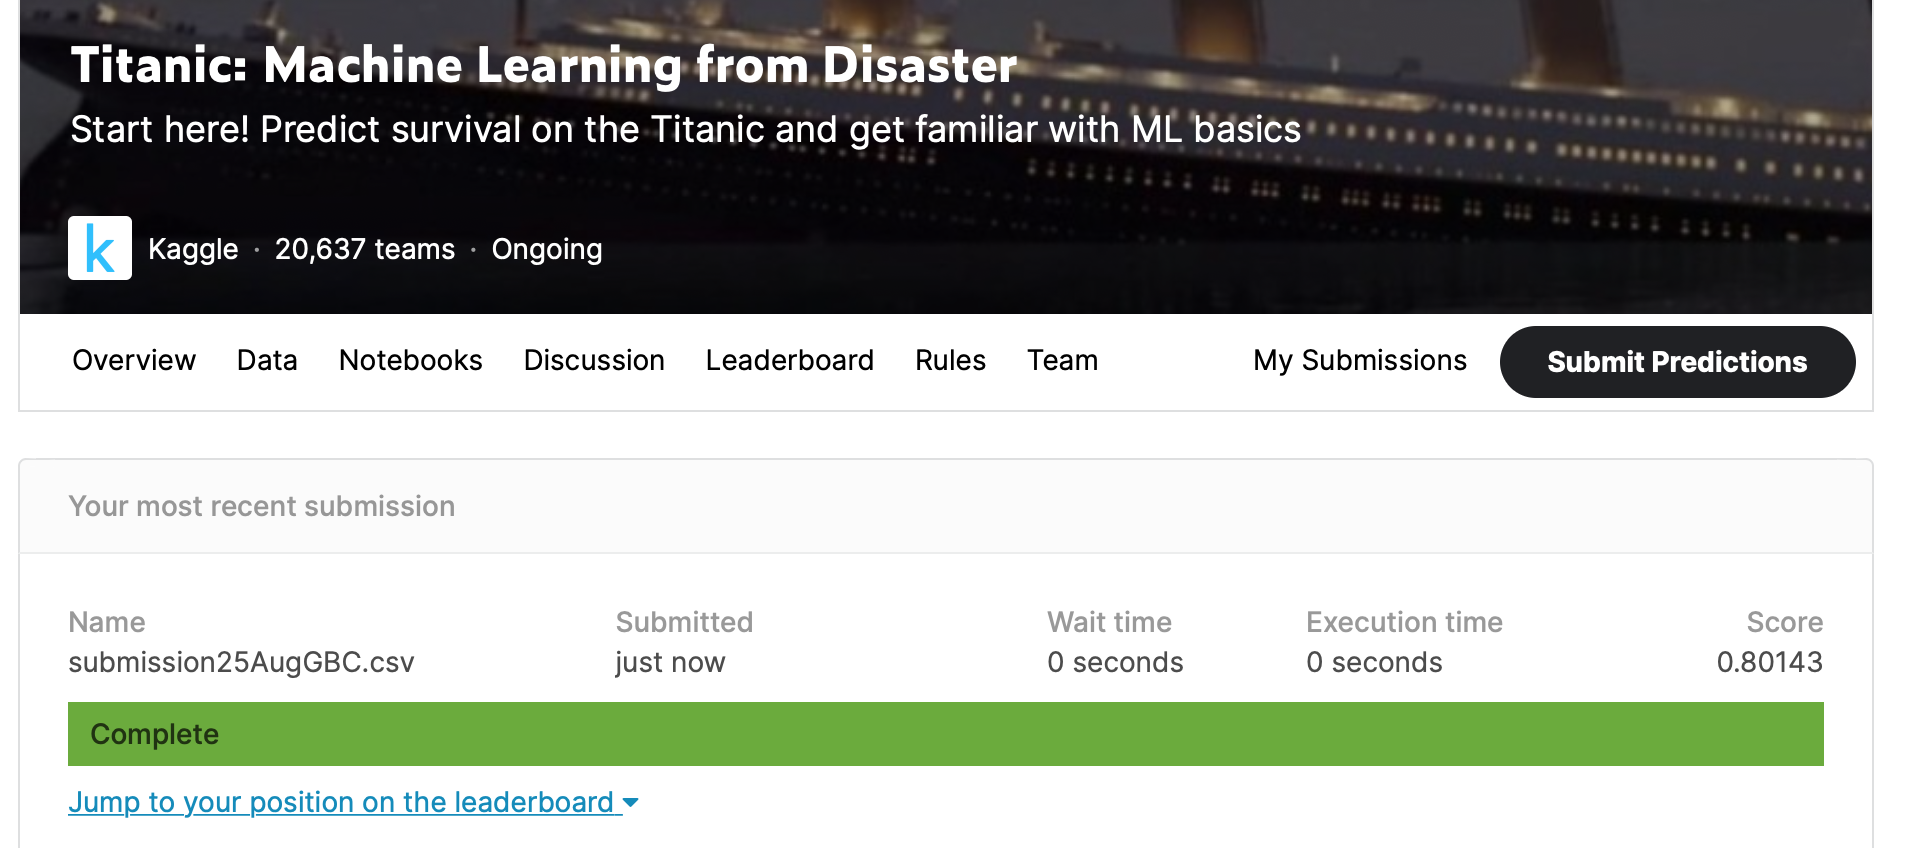

In [199]:
from IPython.display import Image
Image("/Users/user/Desktop/Screenshot 2020-08-25 at 7.48.11 PM.png")

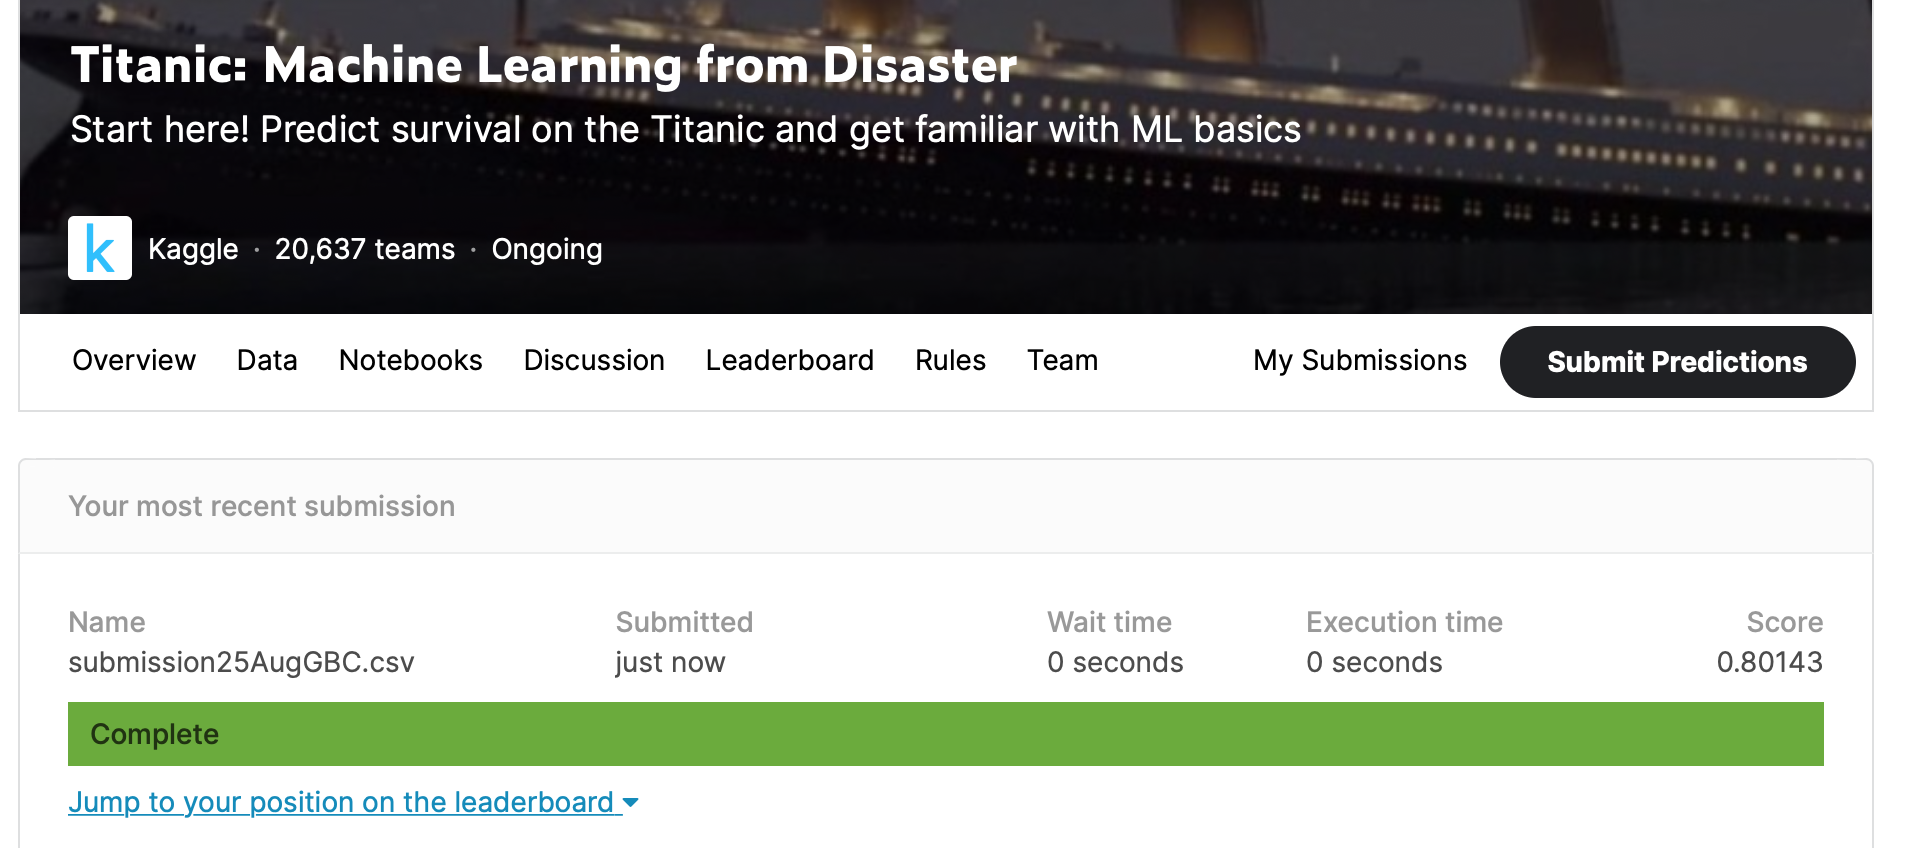

In [200]:
#Submitted and got accuracy score of .80143 on Kaggle

# Happy Learning............

# Notebook is available at 

## https://github.com/lalitmach22/Titanic